# Classification of Retinal Fundus Images


This summery reports on the following performed tasks:

0. Description of the data
1. Data evaluation
    * visualizing a sub-sample of the data and developing ideas on how to feed the images to a deep learning model
    * Getting an idea of the class distributions in the data
    * identifying two subset of the dataset for further classification
2. Model training
    * Selecting two well-stablished deeplearning network for performing the task of classification (VGG16 and ResNet50)
    * Writing the VGG16 model from scratch, and importing the ResNet model from Pytorch with pre-trained weights from ImageNet data
    * Writing every aspect of deep learning model training pipeline: Dataset, dataloader, train function, etc. and specifying them to the task.
    * performing the training (4 sessions: each model wass used two classify each of the two subsets of data)
3. Evaluating the models
    * Visualizing the train/val curves of the trained models
    * Performing sensitivity/specificity analysis and calculating F1 accuracy for every model
    * Analyze the downsides of the analyses performed
    
    
**The repository can be ran through notebooks located in the notebooks folder.**
**My final unfinished task was to remove the contingencies on the path directories that refer to my laptop. 
** the user needs to adjust the i/o directories in order to run the rep

## 0. Selected data

open source, free to download and broadly licensed dataset, RFMiD was selected to conduct this project.
The following link is a link to the website that contains the dataset (user needs to download the data ~8GB) to their local system and modify the root directories in this repository.

This dataset contains about 3600 retinal fundus images that are annotated into 46 different pathologically relevant classes. 

[link to data](https://ieee-dataport.org/open-access/retinal-fundus-multi-disease-image-dataset-rfmid)

## 1. Data Evaluation

**Visualizing a subset of the data**
2 sets of 25 images (total of 50 images visualized)


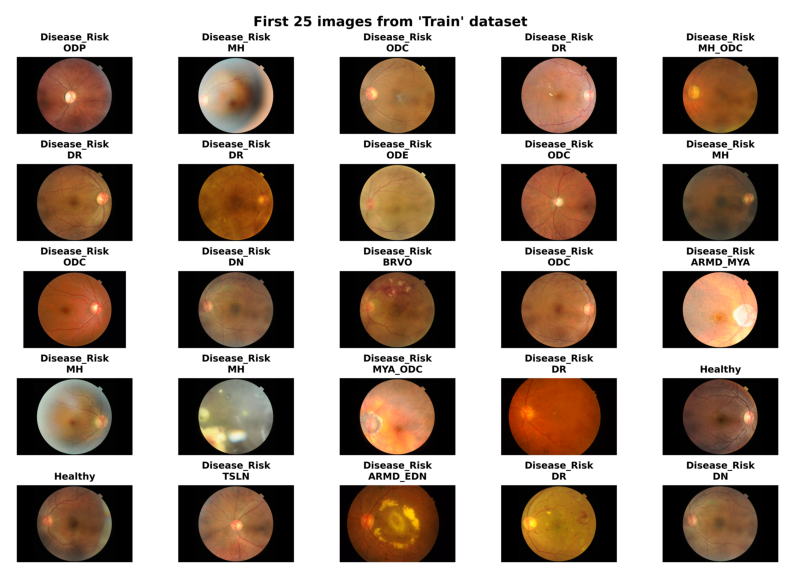

In [12]:
# @hidden_cell
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.open('/Users/simpleai/Desktop/az_task/results/task1/mia_25_0.png'))
ax.axis('off')
plt.show()


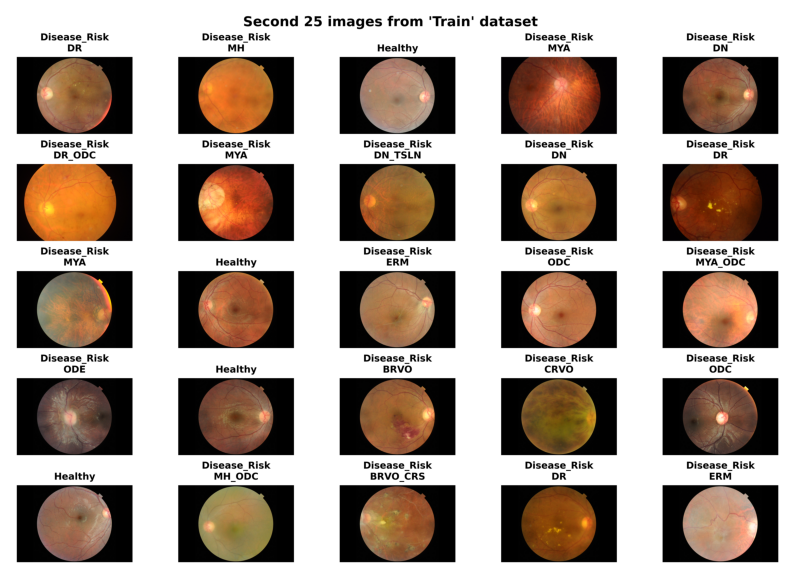

In [13]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.open('/Users/simpleai/Desktop/az_task/results/task1/mia_25_1.png'))
ax.axis('off')
plt.show()

**I noticed a large portion of the cells is black background which contains no information. While there can be many computational ways to wisely crop the image so that the amount of cropped fundus images gets minimized, I figured simply a center crooping can do the job faster and easire.** reflected below is are 25 images centercropped:

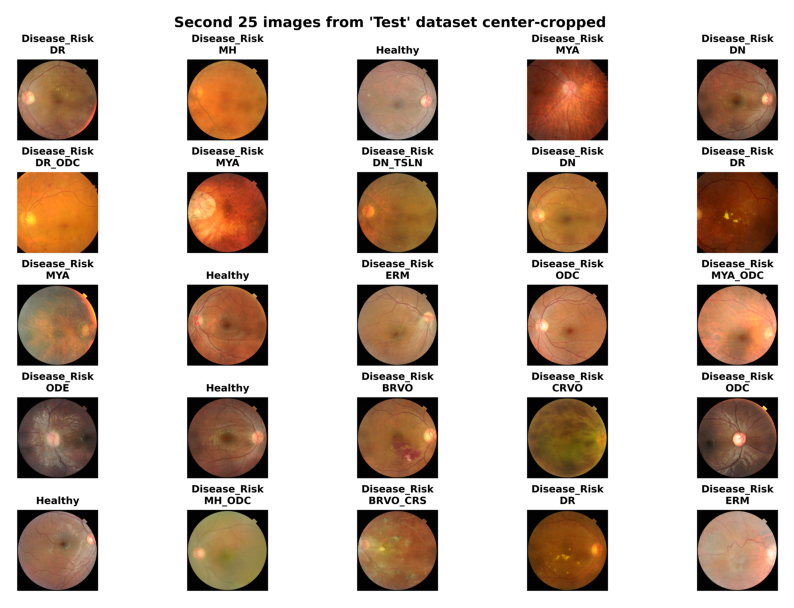

In [15]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.open('/Users/simpleai/Desktop/az_task/results/task1/centercropped_mia_25_1.png'))
ax.axis('off')
plt.show()

*Next, the distribution of the classes were analyzed to get a sence of how many class exists in the annotation and how balanced they are.**

***note that the dataset that I downloaded was already divided into train/val/test***

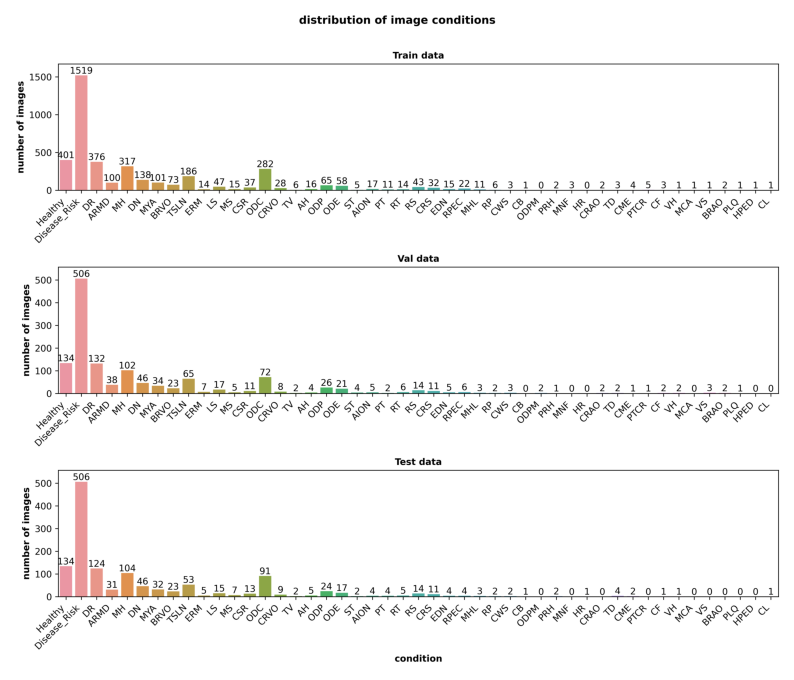

In [16]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.open('/Users/simpleai/Desktop/az_task/results/task1/data_distribution.png'))
ax.axis('off')
plt.show()

## selecting two subset of data for following the further classification task
1. a binary data: containing two classes of "healthy" and those that are labeled as "Disease Risk"
2. a multi class data (7 classes including several disease conditions)

The groups were selected amongst those that had a decent number of images per class in each subset of the data (train/val/test)

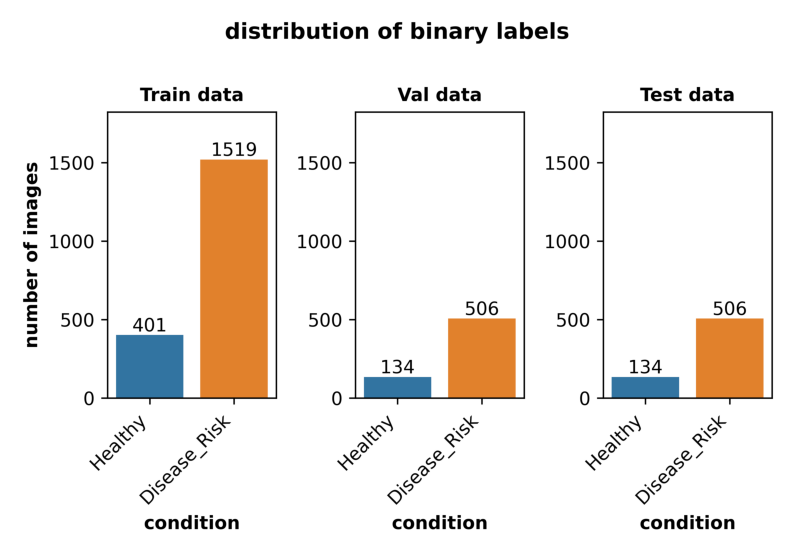

In [17]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.open('/Users/simpleai/Desktop/az_task/results/task1/binary_data_distribution.png'))
ax.axis('off')
plt.show()

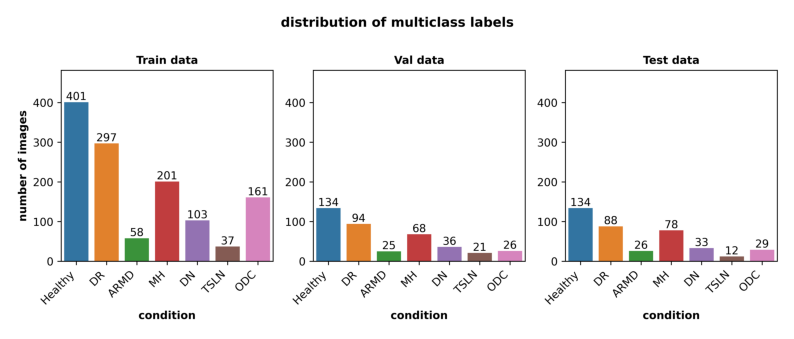

In [18]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.open('/Users/simpleai/Desktop/az_task/results/task1/multiclass_data_distribution.png'))
ax.axis('off')
plt.show()

# 2. Model Training

* Two model architectures were used for training:
1. VGG16
2. ResNet50 (pre-trained)

* two models were trained using each of the architectures
1. VGG16 trained on binary and multiclass data
2. ResNet50 trained on binary and multiclass data

The notebooks task2_binary_classification.ipynb and task2_multiclass_classification.ipynb containe the codes used for the training. 

**Please note that these notebooks use many functions that I have stored under the folder "scripts"**

**Some of the considerations for training:**
1. CrossEntropyLoss was seen as a suitable loss function for this task and was used in training of the 4 models
2. L2 regularization was added to the optimizer Adam.
3. No Augmentation was used:
    * I would absolutely do data augmentations of different kind on this data (channel jitter, CLAHE, Blur, Rotate, scale, crop, etc.) especially to balance the huge imbalances that exists in this data. For this task however, as I was using my personlal M1 chip Mac, performing more augmentation for balancing the data would meant having more data for training and slower training. 
    * I could have used some on-the-fly augmentation when the data is being loaded, which I'm sure would have had some positive effect in inhibiting overfitting of the models, but I was short on time so I did not implement them. 
    * in order to address the imbalance, however, I did implement exerting weights on the loss functions. 
    * I wrote the VGG16 model from scratch as I believe this will give me quite a lot of freedom in modifying my models when necessary. Of course, I will not try to re-invent the wheel. So, in cases where writing the model from scratch gets so much time, I would try to use of-the-shelf and already written models. In the case of the VGG16 however, writing it from scratch is not that time consuming.
    * I also recommend adding learning rate scheduler, which is not used in this repo, especially in the case of ResNet50 model, because in the training curves we can see that it gets so close to the local optima and it stays there fo a while and then it diverges which is a probable outcome of having constant learning rate at the vicininty of local minima points.

# 3. Model Evaluation

## Train/validaion curves

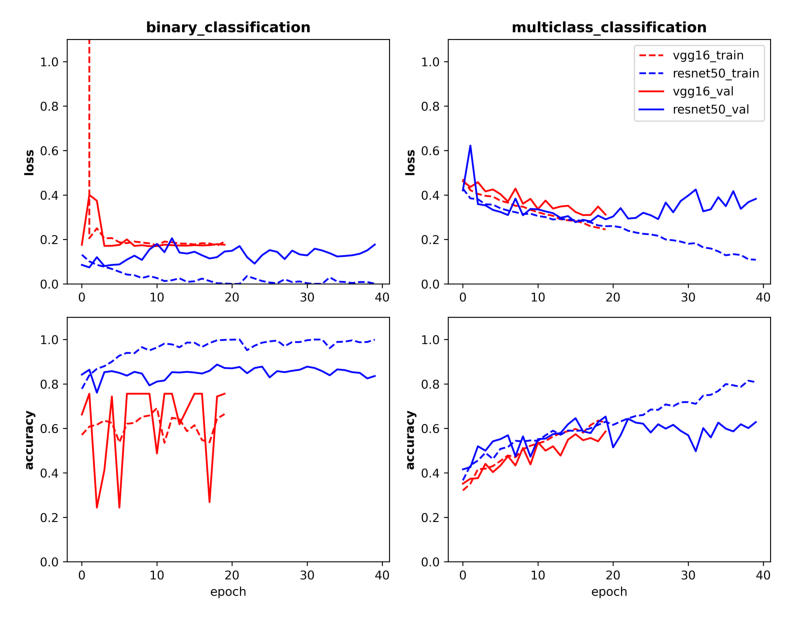

In [24]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.open('/Users/simpleai/Desktop/az_task/results/task3/train_val_curves.png'))
ax.axis('off')
plt.show()

I want to admit that the above image does not look as nice as what I envisioned. Top panels show losses over the training and bottom panels show accuracy of the binary classification (on the left) task and the multi-class classification (right panels) task. Each panel has results of both VGG16 and ResNet50 in both training and validation in them. 

My interpretatino of what we see is taht on the right we see much more reasonable progression of the curves. Red lines have stoped after 20 epochs but their trend is in the right direction so I would let them be trained more. On the right panels (multi-class classification) focusing on blure lines (resnet50 mode) we can see that the model trains well until epoch 20 and then overfitting begins. **In such cases, using image augmentations could have been very helpful if implemented**

In general, Resnet50 network is more capable than VGG16 because of the fact that they can train in deeper layers due to existence of residual skip connections that help them to overcome the vanishing gradient problem. So it is not strange that the Resnet50 model seems to be excelling in terms learning more.

With regards to the binary classification task, the VGG16 network was unable to learn that much. The final accuracy of 0.78 is in the level of random guessing of the labels given the imbalance that exists in the data. (80% of the binary data is labeled "disease", hence 78 percent accuracy is notthing close to ok! The ResNet50 network, however, was capable of learning the classification to some extent and showed more than 85% accuracy. Given that no augmentations was doen and no Learning rate escheduler was used, I see a lot of potential in ResNet50 to be able to overcome that vinary classification task. 

## sensitivity and specificity analysis (test data was used)

* in this section I looked at every individual output of the model and checked them against the labels, making the confusion map for all the 4 training sessions calculating F1 accuracy metrics

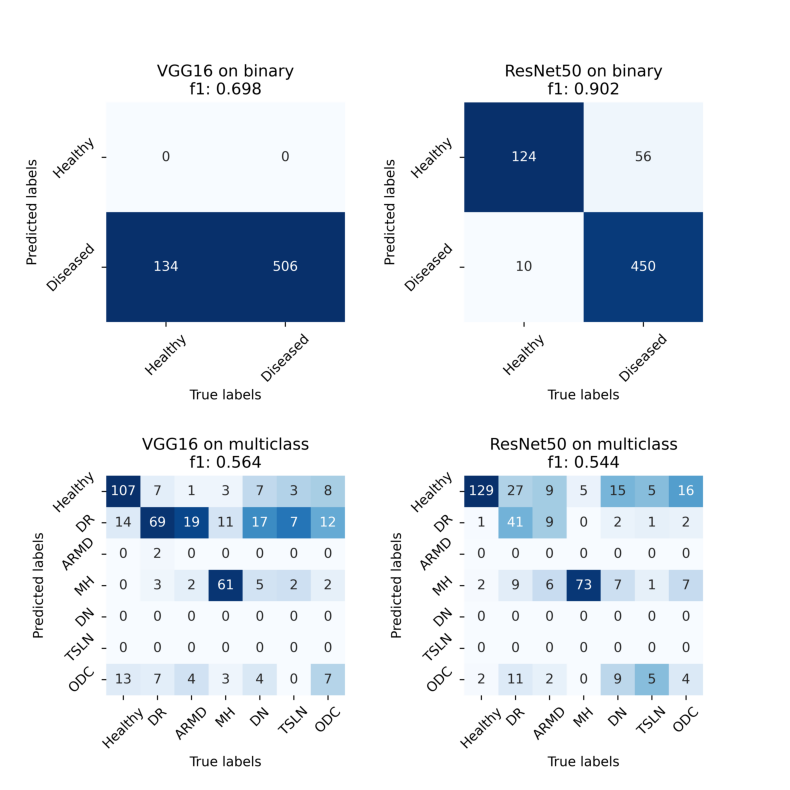

In [25]:
fix, ax = plt.subplots(figsize=(10,10))
ax.imshow(Image.open('/Users/simpleai/Desktop/az_task/results/task3/conf_mat.png'))
ax.axis('off')
plt.show()

* As we can see in the above, the best performace belongs to ResNet50 model on the binary task. The f1 scores are calculated in a weighted fashion and the above 90% F1 score is quite high. 

* Both models behave the same when it comes to the multi-class classification task. They are both doing a good job when it comes to the Healthy and MH groups, but not that of a great work with regards to other five vlasses. Given the variable data imbalanced that was remained not addressed, not utilizing a deep parameter tunning, and not using a job scheduler, I refrain from jodging which model is better in the case of the multi-class classification. 

# Conclusion

* In this study I conducted a classification analysis on an open source retinal fundus data. My results indicates that ResNet50 network has high potentials in classifying diseased versus healthy retinal fundus images. 

* At the end, I would like to thank the interview panel for reading this report. I apologize in advance for having typos in it. 

* I had to remove the trained models from the repo, in order to upload it. Please let me know in case you wanted to have access to the trained models, I can share them with over google drive.

Kamyar Esmaeili Pourfarhangi 
